In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import csv
import gensim
import numpy as np
import seaborn as sns
import joblib
import snscrape.modules.twitter as sntwitter
import demoji
from nltk.corpus import stopwords
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from time import time
from datetime import datetime as dt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [26]:
file_loc = "datakorupsibaru.csv"
ppkm_dataset = pd.read_csv(file_loc, lineterminator="\n")
ppkm_dataset = ppkm_dataset.rename(columns={"Isi konten": "tweet"})
ppkm_dataset["tweet"] # memastikan kolom "tweet" sudah ada pada dataframe

0        @tvOneNews Mau tethub bebas  atas meroket teta...
1        @Okki_Sutanto @hariankompas Pusing ya, masa se...
2        Mungkin lebih baik maksimalkan.kerja polri dan...
3        @DavidWijaya82 Bukan cuma kasus ini aja yang b...
4        @alisyarief @PDI_Perjuangan partai gagal membu...
                               ...                        
14995    Keren banget deh Prabowo, Menhan baru, fokus b...
14996    @Verraagustian_ aku kui seneng karo cak thotiq...
14997    Keren banget deh Prabowo, Menhan baru, fokus b...
14998    Prabowo, Menhan penuh semangat: bye-bye budaya...
14999    Prabowo, Menhan penuh semangat: bye-bye budaya...
Name: tweet, Length: 15000, dtype: object

In [20]:
ppkm_dataset.loc[10, "Isi konten"]

'@MurtadhaOne1 Ngomongin korupsi di kandang koruptor'

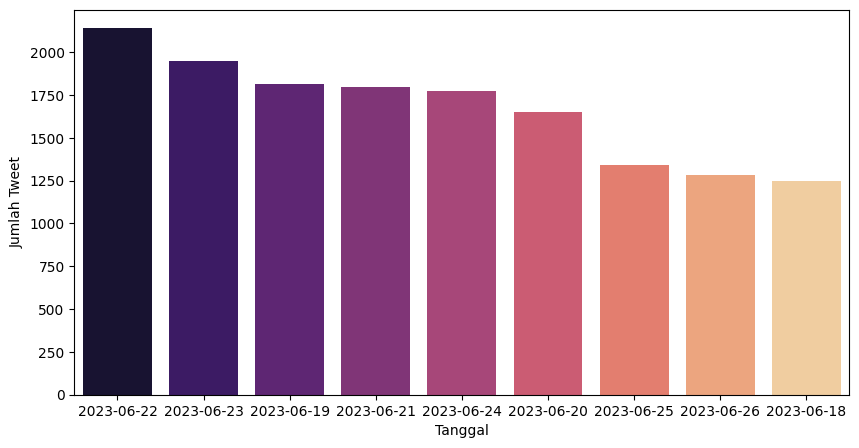

In [27]:
ppkm_tweets = ppkm_dataset.copy()
ppkm_tweets["Date"] = pd.to_datetime(ppkm_tweets["Date"], format="%Y-%m-%d %H:%M:%S%z")
ppkm_tweets["Date"] = pd.to_datetime(ppkm_tweets["Date"]).dt.date
number = [count for count in ppkm_tweets["Date"].value_counts()]
timeline = list(ppkm_tweets["Date"].value_counts().index)
figure, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=timeline, y=number, palette="magma")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Tweet")
plt.show()

In [28]:
def removal_of_sensitive_info(text):
    text = text.replace("\n", " ")
    text = re.sub("@[A-Za-z0-9]+", " ", text)
    text = re.sub("#[A-Za-z0-9]+", " ", text)
    return text
ppkm_dataset["preprocessed"] = ppkm_dataset.tweet.apply(lambda text: removal_of_sensitive_info(text))
ppkm_dataset = ppkm_dataset.reindex(["User", "Isi konten", "preprocessed", "Date"], axis=1)
ppkm_dataset

,User,Isi konten,preprocessed,Date
0,HcIndependen,NaN,Mau tethub bebas atas meroket tetap aja ut...,2023-06-26 23:59:44+00:00
1,theforge8888,NaN,"_Sutanto Pusing ya, masa selalu muncul kasu...",2023-06-26 23:55:34+00:00
2,24b5cc37e61d40f,NaN,Mungkin lebih baik maksimalkan.kerja polri dan...,2023-06-26 23:54:20+00:00
3,DavinaSastro,NaN,Bukan cuma kasus ini aja yang bakal menjerat...,2023-06-26 23:53:37+00:00
4,rangkutifuat,NaN,_Perjuangan partai gagal membuktikan diri m...,2023-06-26 23:49:36+00:00
...,...,...,...,...
14995,reifeiza,NaN,"Keren banget deh Prabowo, Menhan baru, fokus b...",2023-06-18 02:18:00+00:00
14996,sastrotingkir,NaN,_ aku kui seneng karo cak thotiq ... mugo mug...,2023-06-18 02:17:42+00:00
14997,rikosaptr,NaN,"Keren banget deh Prabowo, Menhan baru, fokus b...",2023-06-18 02:17:35+00:00
14998,reifeiza,NaN,"Prabowo, Menhan penuh semangat: bye-bye budaya...",2023-06-18 02:17:30+00:00


In [ ]:
def removal_of_sensitive_info(text):
    text = text.replace("[USERNAME]", " ")
    text = text.replace("[URL]", " ")
    text = text.replace("[SENSITIVE-NO]", " ")
    text = re.sub("#[A-Za-z0-9]+", " ", text)
    return text
ppkm_dataset["preprocessed"] = ppkm_dataset.tweet.apply(lambda text: removal_of_sensitive_info(text))
ppkm_dataset

In [29]:
def removal_of_emojis(text):
    text = demoji.replace(text, " ")
    return text
ppkm_dataset.preprocessed = ppkm_dataset.preprocessed.apply(lambda text: removal_of_emojis(text))
ppkm_dataset

,User,Isi konten,preprocessed,Date
0,HcIndependen,NaN,Mau tethub bebas atas meroket tetap aja ut...,2023-06-26 23:59:44+00:00
1,theforge8888,NaN,"_Sutanto Pusing ya, masa selalu muncul kasu...",2023-06-26 23:55:34+00:00
2,24b5cc37e61d40f,NaN,Mungkin lebih baik maksimalkan.kerja polri dan...,2023-06-26 23:54:20+00:00
3,DavinaSastro,NaN,Bukan cuma kasus ini aja yang bakal menjerat...,2023-06-26 23:53:37+00:00
4,rangkutifuat,NaN,_Perjuangan partai gagal membuktikan diri m...,2023-06-26 23:49:36+00:00
...,...,...,...,...
14995,reifeiza,NaN,"Keren banget deh Prabowo, Menhan baru, fokus b...",2023-06-18 02:18:00+00:00
14996,sastrotingkir,NaN,_ aku kui seneng karo cak thotiq ... mugo mug...,2023-06-18 02:17:42+00:00
14997,rikosaptr,NaN,"Keren banget deh Prabowo, Menhan baru, fokus b...",2023-06-18 02:17:35+00:00
14998,reifeiza,NaN,"Prabowo, Menhan penuh semangat: bye-bye budaya...",2023-06-18 02:17:30+00:00


In [30]:
def lower_casing(text):
    return text.lower()

ppkm_dataset.preprocessed = ppkm_dataset.preprocessed.apply(lambda text: lower_casing(text))
ppkm_dataset

,User,Isi konten,preprocessed,Date
0,HcIndependen,NaN,mau tethub bebas atas meroket tetap aja ut...,2023-06-26 23:59:44+00:00
1,theforge8888,NaN,"_sutanto pusing ya, masa selalu muncul kasu...",2023-06-26 23:55:34+00:00
2,24b5cc37e61d40f,NaN,mungkin lebih baik maksimalkan.kerja polri dan...,2023-06-26 23:54:20+00:00
3,DavinaSastro,NaN,bukan cuma kasus ini aja yang bakal menjerat...,2023-06-26 23:53:37+00:00
4,rangkutifuat,NaN,_perjuangan partai gagal membuktikan diri m...,2023-06-26 23:49:36+00:00
...,...,...,...,...
14995,reifeiza,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:18:00+00:00
14996,sastrotingkir,NaN,_ aku kui seneng karo cak thotiq ... mugo mug...,2023-06-18 02:17:42+00:00
14997,rikosaptr,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:17:35+00:00
14998,reifeiza,NaN,"prabowo, menhan penuh semangat: bye-bye budaya...",2023-06-18 02:17:30+00:00


In [31]:
def remove_numbers(text):
    text = re.sub("[0-9]+", " ", text)
    return text
ppkm_dataset.preprocessed = ppkm_dataset.preprocessed.apply(lambda text: remove_numbers(text))
ppkm_dataset

,User,Isi konten,preprocessed,Date
0,HcIndependen,NaN,mau tethub bebas atas meroket tetap aja ut...,2023-06-26 23:59:44+00:00
1,theforge8888,NaN,"_sutanto pusing ya, masa selalu muncul kasu...",2023-06-26 23:55:34+00:00
2,24b5cc37e61d40f,NaN,mungkin lebih baik maksimalkan.kerja polri dan...,2023-06-26 23:54:20+00:00
3,DavinaSastro,NaN,bukan cuma kasus ini aja yang bakal menjerat...,2023-06-26 23:53:37+00:00
4,rangkutifuat,NaN,_perjuangan partai gagal membuktikan diri m...,2023-06-26 23:49:36+00:00
...,...,...,...,...
14995,reifeiza,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:18:00+00:00
14996,sastrotingkir,NaN,_ aku kui seneng karo cak thotiq ... mugo mug...,2023-06-18 02:17:42+00:00
14997,rikosaptr,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:17:35+00:00
14998,reifeiza,NaN,"prabowo, menhan penuh semangat: bye-bye budaya...",2023-06-18 02:17:30+00:00


In [32]:
def remove_multi_whitespaces(text):
    text = re.sub(" +", " ", text).strip(" ")
    return text
ppkm_dataset.preprocessed = ppkm_dataset.preprocessed.apply(lambda text: remove_multi_whitespaces(text))
ppkm_dataset

,User,Isi konten,preprocessed,Date
0,HcIndependen,NaN,mau tethub bebas atas meroket tetap aja utang ...,2023-06-26 23:59:44+00:00
1,theforge8888,NaN,"_sutanto pusing ya, masa selalu muncul kasus y...",2023-06-26 23:55:34+00:00
2,24b5cc37e61d40f,NaN,mungkin lebih baik maksimalkan.kerja polri dan...,2023-06-26 23:54:20+00:00
3,DavinaSastro,NaN,bukan cuma kasus ini aja yang bakal menjerat s...,2023-06-26 23:53:37+00:00
4,rangkutifuat,NaN,_perjuangan partai gagal membuktikan diri memb...,2023-06-26 23:49:36+00:00
...,...,...,...,...
14995,reifeiza,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:18:00+00:00
14996,sastrotingkir,NaN,_ aku kui seneng karo cak thotiq ... mugo mugo...,2023-06-18 02:17:42+00:00
14997,rikosaptr,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:17:35+00:00
14998,reifeiza,NaN,"prabowo, menhan penuh semangat: bye-bye budaya...",2023-06-18 02:17:30+00:00


In [33]:
def remove_single_letters(text):
    return " ".join([w for w in text.split() if len(w) > 1])
ppkm_dataset.preprocessed = ppkm_dataset.preprocessed.apply(lambda text: remove_single_letters(text))
ppkm_dataset

,User,Isi konten,preprocessed,Date
0,HcIndependen,NaN,mau tethub bebas atas meroket tetap aja utang ...,2023-06-26 23:59:44+00:00
1,theforge8888,NaN,"_sutanto pusing ya, masa selalu muncul kasus y...",2023-06-26 23:55:34+00:00
2,24b5cc37e61d40f,NaN,mungkin lebih baik maksimalkan.kerja polri dan...,2023-06-26 23:54:20+00:00
3,DavinaSastro,NaN,bukan cuma kasus ini aja yang bakal menjerat s...,2023-06-26 23:53:37+00:00
4,rangkutifuat,NaN,_perjuangan partai gagal membuktikan diri memb...,2023-06-26 23:49:36+00:00
...,...,...,...,...
14995,reifeiza,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:18:00+00:00
14996,sastrotingkir,NaN,aku kui seneng karo cak thotiq ... mugo mugo o...,2023-06-18 02:17:42+00:00
14997,rikosaptr,NaN,"keren banget deh prabowo, menhan baru, fokus b...",2023-06-18 02:17:35+00:00
14998,reifeiza,NaN,"prabowo, menhan penuh semangat: bye-bye budaya...",2023-06-18 02:17:30+00:00


In [35]:
from gensim.models import FastText
import numpy as np

model = FastText.load_fasttext_format('C:/Users/rizky/Downloads/Gemastik tahun lalu/Gemastik/Pre-trained Word Embedding/Fastext_model_tweet.bin')
vectors = []
for text in ppkm_dataset.preprocessed.values:
    word_embedding = []
    for word in text.split(" "):
        try:
            word_vec = model.wv[word]
            word_embedding.append(word_vec)
        except:
            pass
    word_embedding = np.array(word_embedding)
    embeddings = np.mean(word_embedding, axis=0)
    vectors.append(embeddings)
vectors = np.array(vectors)
print("Dimensi dari fitur yang digunakan yaitu", (vectors.shape))

C:\Users\rizky\AppData\Local\Temp\ipykernel_29096\2491785329.py:4: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = FastText.load_fasttext_format('Fastext_model_tweet.bin')


Dimensi dari fitur yang digunakan yaitu (15000, 100)


In [45]:
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans

filename = 'C:/Users/rizky/Downloads/Gemastik tahun lalu/Gemastik/Pre-trained Word Embedding/Word2Vec_400dim.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

df = ppkm_dataset

vectorized_tweets = []
for tweet in df['preprocessed']:
    words = tweet.split()
    vector = [model[word] for word in words if word in model.key_to_index]
    vectorized_tweets.append(vector)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (15000,) + inhomogeneous part.

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(vectorized_tweets)

labels = kmeans.labels_

df['label'] = labels

df.to_csv('ppkm_dataset.csv', index=False)


In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(vectorized_tweets)

labels = kmeans.labels_

ValueError: could not convert string to float: 'mau tethub bebas atas meroket tetap aja utang dan utang utang utang utang lagi.jadi buat apa kita setor pajak, utang dan korupsi tetap meroket'

In [36]:
ppkm_dataset.to_csv('fasttext_data_korupsi.csv', index=False)